In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def estimate(gamma, delta, alpha, beta, s, N, r):
    all_beta_ols = []
    all_beta_2sls = []
    all_alpha_ols = []
    all_alpha_2sls = []
    for i in range(s):
        #generate data
        u,v = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]],N).T
        z = np.random.choice([-1,0,1],N)
        y2 = (-gamma - delta * z) < v
        y2 = y2.astype(int)
        y1 = (-alpha - beta * y2) < u
        y1 = y1.astype(int)
        #estimate ols 2sls
        beta_ols = np.cov(y1,y2)[0][1] / np.cov(y1,y2)[1][1]
        alpha_ols = y1.mean() - beta_ols * y2.mean()
        beta_2sls = np.cov(z,y1)[0][1] / np.cov(z,y2)[0][1]
        alpha_2sls = y1.mean() - beta_2sls * y2.mean()
        #append
        all_beta_ols.append(beta_ols)
        all_alpha_ols.append(alpha_ols)
        all_beta_2sls.append(beta_2sls)
        all_alpha_2sls.append(alpha_2sls)
    return all_beta_ols, all_alpha_ols, all_beta_2sls, all_alpha_2sls,y1,y2,z

In [3]:
def identify_set(z, y1, y2):
    lb0s = []
    ub0s = []
    lb10s = []
    ub10s = []
    for Z in [-1, 0 ,1]:
        ind = np.where(z == Z)[0]
        n = ind.shape[0]
        y1_z = y1[ind]
        y2_z = y2[ind]
        lb0 = y1_z.sum()/n #lower bound of rho_0
        ub0 = 1 - ((y1_z + y2_z) == 0).sum() / n #upper bound of rho_0
        lb10 = ((y1_z + y2_z) == 2).sum() / n # lower bound of rho_1 + rho_0
        ub10 = y1_z.sum()/n # upper bound of rho_0 + rho_1
        lb0s.append(lb0)
        ub0s.append(ub0)
        lb10s.append(lb10)
        ub10s.append(ub10)
    lb0 = max(lb0s)
    ub0 = min(ub0s)
    lb10 = max(lb10s)
    ub10 = min(ub10s)
    ub1 = ub10 - lb0
    lb1 = lb10 - ub0
    return lb0, ub0, lb1, ub1

In [4]:
def identify_set_pos(z, y1, y2):
    lb0s = []
    ub0s = []
    lb10s = []
    ub10s = []
    for Z in [-1, 0 ,1]:
        ind = np.where(z == Z)[0]
        n = ind.shape[0]
        y1_z = y1[ind]
        y2_z = y2[ind]
        lb0 = y1_z[np.where(y2_z == 0)[0]].sum() / n #lower bound of rho_0
        ub0 = y1_z.sum()/n #upper bound of rho_0
        lb10 = y1_z.sum()/n # lower bound of rho_1 + rho_0
        ub10 = 1 - y2_z[np.where(y1_z == 0)[0]].sum() / n # upper bound of rho_0 + rho_1
        lb0s.append(lb0)
        ub0s.append(ub0)
        lb10s.append(lb10)
        ub10s.append(ub10)
    lb0 = max(lb0s)
    ub0 = min(ub0s)
    lb10 = max(lb10s)
    ub10 = min(ub10s)
    ub1 = ub10 - lb0
    lb1 = lb10 - ub0
    return lb0, ub0, lb1, ub1

In [5]:
#True parameter
alpha = 0.
gamma = 0.
beta = -1.
delta = 0.5
r = -0.7
N = 1000 #data number
#Generate data

s = 500 # simulation number

def plot(alpha, gamma, beta, delta, r, N, s):
    # simultation result
    all_beta_ols, all_alpha_ols, all_beta_2sls, all_alpha_2sls,y1,y2,z = estimate(gamma, delta, alpha, beta, s, N, r)

    # Parallelogram
    fig,ax = plt.subplots()
    ax.set_xlim([0, 1])
    ax.set_ylim([-1, 1])
    lb0, ub0, lb1, ub1 = identify_set(z, y1, y2)
    x_ = [lb0,lb0,ub0,ub0]
    y_ = [lb1,ub1,ub1 - (ub0-lb0),lb1 - (ub0-lb0)]
    ax.add_patch(patches.Polygon(xy=list(zip(x_,y_)), fill=False))

    if r > 0:
        lb0, ub0, lb1, ub1 = identify_set_pos(z, y1, y2)
        x_ = [lb0,lb0,ub0,ub0]
        y_ = [lb1,ub1,ub1 - (ub0-lb0),lb1 - (ub0-lb0)]
        ax.add_patch(patches.Polygon(xy=list(zip(x_,y_)), fill=False))

    ax.scatter(all_alpha_ols, all_beta_ols,s=1,color='blue',label='ols')
    ax.scatter(all_alpha_2sls, all_beta_2sls,s=1,color='red',label = '2sls')
    eg = ax.legend();
    plt.show()  

### delta = 0.3

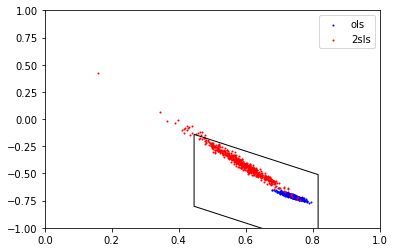

In [8]:
delta = 0.3
plot(alpha, gamma, beta, delta, r, N, s)

### delta = 0.6

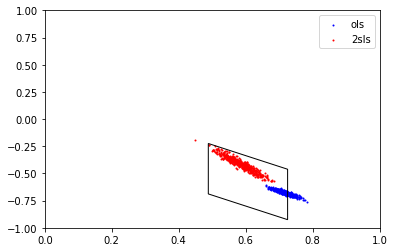

In [9]:
delta = 0.6
plot(alpha, gamma, beta, delta, r, N, s)

### delta = 0.9

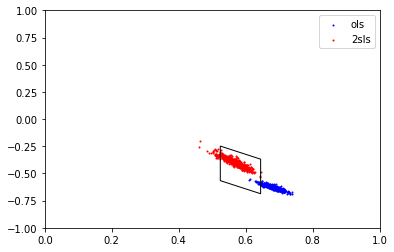

In [10]:
delta = 0.9
plot(alpha, gamma, beta, delta, r, N, s)

### r = 0.7

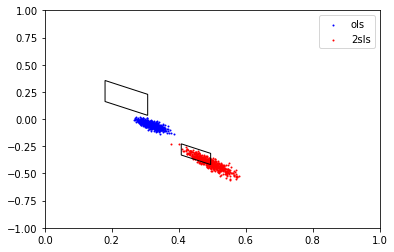

In [11]:
delta = 0.9
r = 0.7
plot(alpha, gamma, beta, delta, r, N, s)

#### U cdf plot

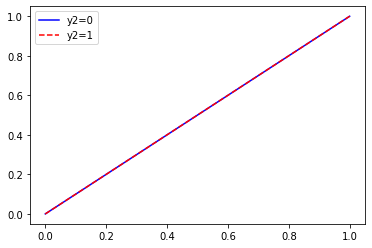

In [523]:
#y2=0
ind = np.where(y2 == 0)[0]
y1_hat = - all_alpha_2sls[-1]
if y1_hat < 0 or y1_hat > 1:
    pdf = 1
    x_values = [0,1]
    y_values = [0,1]
else:
    y1_ = y1[ind]
    ratio = y1_.sum() / y1_.shape[0]
    
    point1 = [0, 0]
    point2 = [y1_hat, 1 - ratio]
    point3 = [1,1]

    x_values = [point1[0], point2[0],point3[0]]
    y_values = [point1[1], point2[1],point3[1]]
#y2=1
ind = np.where(y2 == 1)[0]
y1_hat = -all_alpha_2sls[-1] - all_beta_2sls[-1]
if y1_hat < 0 or y1_hat > 1:
    pdf = 1
    x1_values = [0,1]
    y1_values = [0,1]
else:
    y1_ = y1[ind]
    ratio = y1_.sum() / y1_.shape[0]
    point1 = [0, 0]
    point2 = [y1_hat, 1 - ratio]
    point3 = [1,1]

    x1_values = [point1[0], point2[0],point3[0]]
    y1_values = [point1[1], point2[1],point3[1]]

fig, ax = plt.subplots()
ax.plot(x_values, y_values, '-b', label='y2=0')
ax.plot(x1_values, y1_values, '--r', label='y2=1')
leg = ax.legend()